In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
house_df = pd.read_csv('../../data/sf_vs_nyc_house_data.csv')
house_df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [3]:
df_copy = house_df
np_house  = df_copy.to_numpy(dtype=int)

np_house[:, 1:]

array([[      2,       1,  999000, ...,    1000,     999,      10],
       [      2,       2, 2750000, ...,    1418,    1939,       0],
       [      2,       2, 1350000, ...,    2150,     628,       9],
       ...,
       [      3,       2, 1650000, ...,    1483,    1113,     106],
       [      1,       1,  649000, ...,     850,     764,     163],
       [      3,       2,  995000, ...,    1305,     762,     216]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(np_house[:, 1:], np_house[:, 0], test_size=0.2)

In [5]:
r_f = RandomForestClassifier(n_estimators=3, criterion='entropy', max_depth=10)
r_f.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=3)

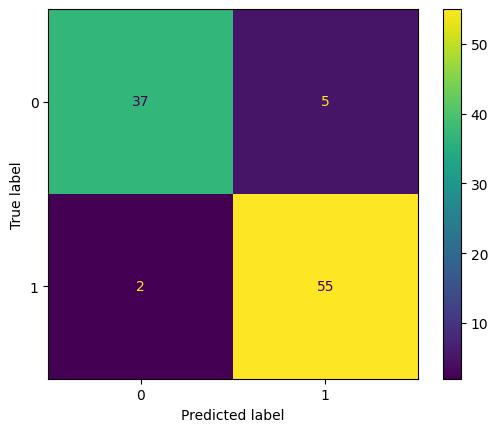

In [6]:
y_pred = r_f.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred)
plt.show()

#  <span style="color:orange">**Now for our own random forest** </span>

In [7]:
from random_forest import RandomForest

In [8]:
r_f_homemade = RandomForest(num_rand_features=3, max_depth=10)

In [9]:
r_f_homemade.fit(X_train, y_train)

In [10]:
y_pred = r_f_homemade.pred(X_test)



0.9090909090909091


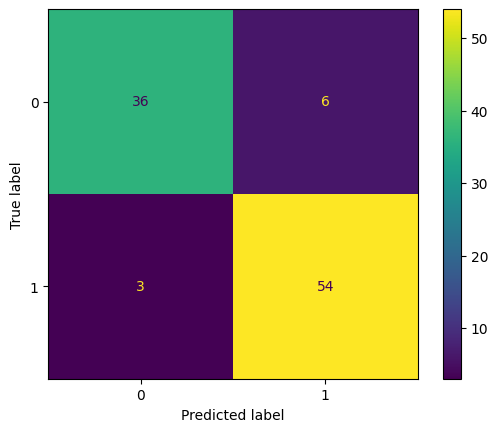

In [11]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
print(accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred)
plt.show()